In [55]:
#!pip install yfinance
import yfinance as yf
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [61]:
#We are going to use the Indian Company "GAIL(Gas Authority of India Ltd)" stock value
stock_symbol = 'GAIL.NS'

In [62]:
#We have taken last 8 years data with interval of 1 day
end_date = dt.datetime.strptime("2022-02-11", "%Y-%m-%d").date()
start_date=end_date-dt.timedelta(days=365*8)
data = yf.download(tickers=stock_symbol,start=start_date,end=end_date,interval='1d')

[*********************100%***********************]  1 of 1 completed


In [63]:
type(data)

pandas.core.frame.DataFrame

In [64]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-13,100.434425,100.954735,98.676613,98.760986,75.702003,1246146
2014-02-14,98.465675,101.812553,97.523483,101.460991,77.771622,1875067
2014-02-17,101.559425,102.473488,100.884422,102.150047,78.299789,1932589
2014-02-18,101.671928,102.276611,99.210983,100.631302,77.135651,2370853
2014-02-19,100.771927,102.037552,100.153175,101.306297,77.653023,1458658


In [65]:
data.describe() #We are displaying the characteristics of the dataset

,Open,High,Low,Close,Adj Close,Volume
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1.969000e+03
mean,131.538266,133.490389,129.441408,131.321929,110.135514,1.007956e+07
std,29.375285,29.608569,28.985842,29.243389,26.641041,8.737209e+06
min,68.449997,72.250000,65.000000,69.400002,59.741135,0.000000e+00
25%,106.000000,107.718803,104.681305,106.129738,85.519318,5.056233e+06
50%,128.559433,130.350006,126.500000,128.649994,107.891792,7.812092e+06
75%,154.000000,155.649994,151.875031,153.350006,136.530136,1.207116e+07
max,197.000000,199.699997,192.100006,196.899994,163.547379,1.147153e+08


In [7]:
len(data)

1969

In [8]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-04,149.750000,151.949997,146.149994,146.550003,141.706985,18772221
2022-02-07,147.449997,148.899994,146.399994,148.250000,143.350800,8159964
2022-02-08,148.350006,148.800003,142.300003,144.300003,139.531342,12055244
2022-02-09,145.000000,145.600006,142.300003,142.949997,138.225937,7631688
2022-02-10,143.399994,143.449997,140.350006,141.600006,136.920563,20379088


<AxesSubplot:>

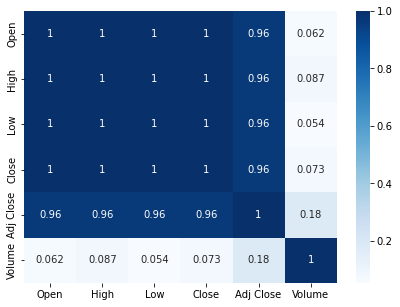

In [9]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),cmap="Blues",annot=True)
#It displays the co-relation between the columns of the dataset

In [10]:
d2=data.copy()

In [11]:
d2['open-high'] = d2['Open']-d2['High']
d2['open-low'] = d2['Open'] - d2['Low']
d2['close-high'] = d2['Close']-d2['High']
d2['close-low'] = d2['Close'] - d2['Low']
d2['high-low'] = d2['High'] - d2['Low']
d2['open-close'] = d2['Open'] - d2['Close']
d2=d2.drop(['Open','High','Low','Close','Adj Close'],axis=1)
d2.tail()

,Volume,open-high,open-low,close-high,close-low,high-low,open-close
Date,,,,,,,
2022-02-04,18772221,-2.199997,3.600006,-5.399994,0.400009,5.800003,3.199997
2022-02-07,8159964,-1.449997,1.050003,-0.649994,1.850006,2.500000,-0.800003
2022-02-08,12055244,-0.449997,6.050003,-4.500000,2.000000,6.500000,4.050003
2022-02-09,7631688,-0.600006,2.699997,-2.650009,0.649994,3.300003,2.050003
2022-02-10,20379088,-0.050003,3.049988,-1.849991,1.250000,3.099991,1.799988


<AxesSubplot:>

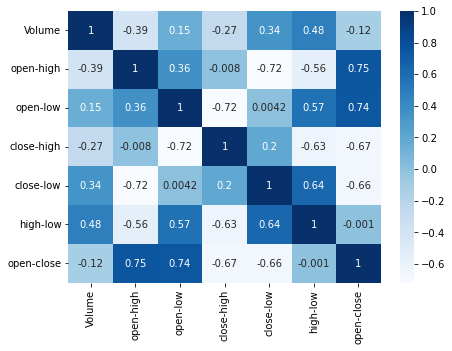

In [12]:
plt.figure(figsize=(7,5))
sns.heatmap(d2.corr(),cmap="Blues",annot=True)

In [13]:
opn = data[['Open']] #It denotes the opening stock value

<AxesSubplot:xlabel='Date'>

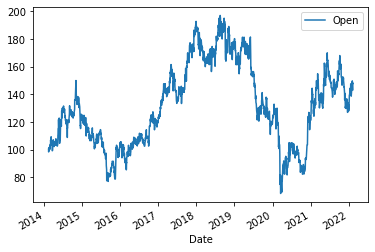

In [14]:
opn.plot()

In [15]:
ds = opn.values

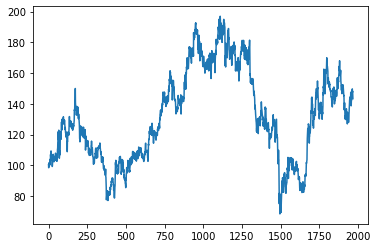

In [16]:
plt.plot(ds)

In [17]:
#We are using MinMaxScaler for scaling (Subtracts the min value and divides by the range)
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [18]:
ds_scaled.shape

(1969, 1)

In [19]:
#We are defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [20]:
train_size,test_size

(1378, 591)

In [21]:
#We are splitting dataset into train and test dataset
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled)-1,:1]

In [22]:
len(ds_train),len(ds_test)

(1378, 590)

In [23]:
#we created a function for making a time series dataset for the model
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [24]:
#We are taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [25]:
X_train.shape,y_train.shape

((1277, 100), (1277,))

In [26]:
X_test.shape, y_test.shape

((489, 100), (489,))

In [27]:
#We are reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

from keras.models import Sequential
from keras.layers import Dense, LSTM

In [29]:
#In this step, we created an LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
#We trained the model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=128,verbose=1)

Epoch 1/50
10/10 [==============================] - 10s 480ms/step - loss: 0.0951 - val_loss: 0.0090
Epoch 2/50
10/10 [==============================] - 3s 325ms/step - loss: 0.0183 - val_loss: 0.0095
Epoch 3/50
10/10 [==============================] - 3s 333ms/step - loss: 0.0093 - val_loss: 0.0070
Epoch 4/50
10/10 [==============================] - 4s 370ms/step - loss: 0.0056 - val_loss: 0.0077
Epoch 5/50
10/10 [==============================] - 3s 347ms/step - loss: 0.0035 - val_loss: 0.0060
Epoch 6/50
10/10 [==============================] - 5s 470ms/step - loss: 0.0029 - val_loss: 0.0060
Epoch 7/50
10/10 [==============================] - 3s 344ms/step - loss: 0.0028 - val_loss: 0.0061
Epoch 8/50
10/10 [==============================] - 3s 345ms/step - loss: 0.0027 - val_loss: 0.0058
Epoch 9/50
10/10 [==============================] - 4s 448ms/step - loss: 0.0026 - val_loss: 0.0057
Epoch 10/50
10/10 [==============================] - 5s 539ms/step - loss: 0.0026 - val_loss: 0.005

In [31]:
model.save('keras.model.h5')

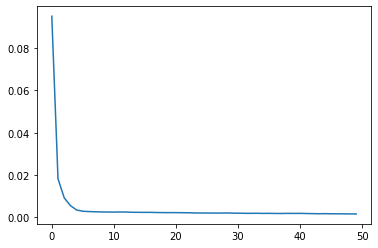

In [32]:
#While pLotting loss, we found that loss has decreased significantly and the model has been trained well
loss = model.history.history['loss']
plt.plot(loss)

In [33]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [34]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

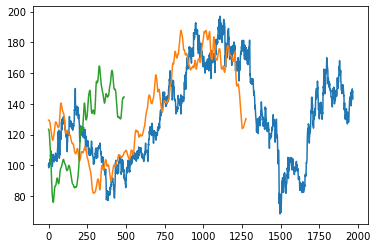

In [35]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled)) #Blue line
plt.plot(train_predict) #Orange line
plt.plot(test_predict) #Green line

In [36]:
type(train_predict)

numpy.ndarray

In [37]:
test = np.vstack((train_predict,test_predict))

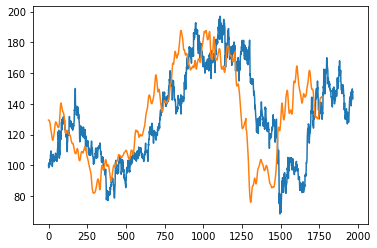

In [38]:
#Combining the predicted data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [39]:
len(ds_test)

590

In [40]:
ds_test.size

590

In [41]:
#We are going to analyse the last 100 days records
fut_inp = ds_test[ds_test.size-100:]

In [42]:
fut_inp = fut_inp.reshape(1,-1)

In [43]:
tmp_inp = list(fut_inp)

In [44]:
fut_inp.shape

(1, 100)

In [45]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [46]:
#Predicting next 30 days price using the current data, It will predict in sliding window manner algorithm with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.5987946391105652], [0.6012619137763977], [0.6030349135398865], [0.6041818261146545], [0.6048213243484497], [0.6050785183906555], [0.6050640344619751], [0.6048654317855835], [0.6045472025871277], [0.6041536927223206], [0.6037139892578125], [0.603244960308075], [0.6027572154998779], [0.6022554636001587], [0.601742148399353], [0.6012181639671326], [0.6006839871406555], [0.6001399159431458], [0.5995863676071167], [0.5990237593650818], [0.5984525084495544], [0.5978737473487854], [0.5972880125045776], [0.5966963768005371], [0.5960993766784668], [0.5954976677894592], [0.5948922038078308], [0.594283401966095], [0.5936717987060547], [0.5930580496788025]]


In [47]:
len(ds_scaled)

1969

In [48]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

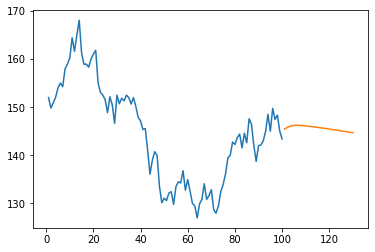

In [49]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[ds_scaled.size-100:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [50]:
ds_new = ds_scaled.tolist()

In [51]:
len(ds_new)

1969

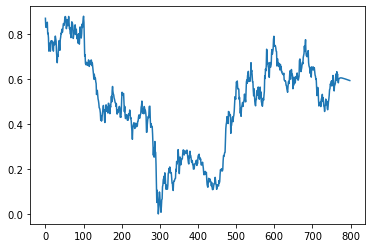

In [52]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [53]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

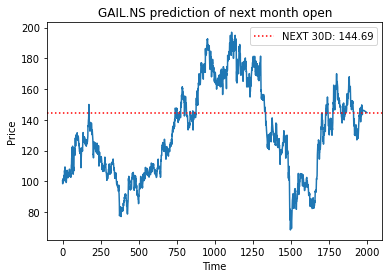

In [54]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

